https://www.kaggle.com/c/word2vec-nlp-tutorial


# 진행할 것

* 데이터의 크기 확인
* 데이터의 수를 확인
* 각 리뷰의 문자 길이
* 많이 사용되는 단어
* 타겟 : 극/부정의 분포
* 각 리부에 사용되는 단어의 수
* 특수문자, 대문자, 소문자 등에 대한 비율 -> 전처리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


* 코드로 압축 파일 해제하는 방법

In [2]:
import os # 운영체제 관련
import zipfile # 압축 파일 처리 관련

In [3]:
# 압축을 풀려고 하는 파일이 있는 폴더 경로
DATA_IN_PATH = "./data/"

# 압축을 풀고자 하는 파일 이름 리스트
file_list = ["labeledTrainData.tsv.zip", "unlabeledTrainData.tsv.zip", "testData.tsv.zip"]

for file in file_list:
    zip_ref = zipfile.ZipFile(DATA_IN_PATH +file, "r" ) #압축 풀 파일 경로
    zip_ref.extractall(DATA_IN_PATH)  # 풀어서 어디에 둘지 폴더 경로
    zip_ref.close()


* 데이터 불러와서 확인

In [4]:
for file in os.listdir(DATA_IN_PATH):
    if "tsv" in file and "zip" not in file:
        print(file.ljust(30) + str(os.path.getsize(DATA_IN_PATH)))

labeledTrainData.tsv          12288
testData.tsv                  12288
unlabeledTrainData.tsv        12288


* DF로 tsv -> csv 동일한데, 구분자를 tab 사용.  read_csv(del=>)

In [5]:

train_data = pd.read_csv(DATA_IN_PATH + "labeledTrainData.tsv", header=0 , delimiter="\t", quoting=3)
train_data.head()


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


* 데이터 수 확인

In [6]:
len(train_data)

25000

* 각 리뷰의 문자 길이 값

In [7]:
# train_length = train_data["review"].apply(lambda x : len(x))
train_length = train_data["review"].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

* 각 리뷰별 단어 수 그래프

<ipython-input-8-42d39a46e827>:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of review')

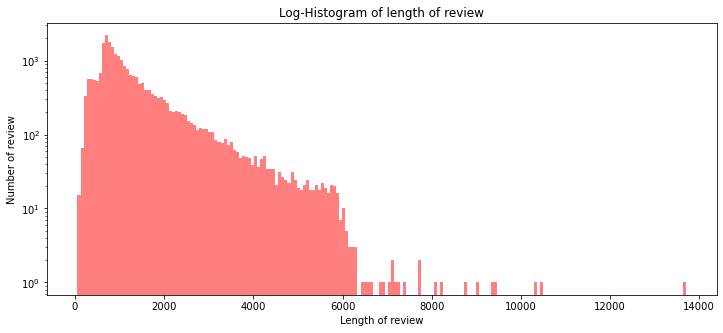

In [8]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')


-> 대부분의 리뷰가 거의  6000자 이하로 작성됨. .. 대다수가 1000~6000 사이인듯

-> 글자수가 8000,10000이상인 것들은 이상치.. 너무 좋아서 흥분해서 길게 or 너무 화나서 흥분해서 길게

In [9]:
print("리뷰 최대 길이",np.max(train_length))
print("리뷰 최소 길이",np.min(train_length))
print("리뷰 평균 길이",np.mean(train_length))
print("리뷰 길이 표준편차",np.std(train_length))
print("리뷰 길이 중앙값",np.median(train_length))

print("리뷰 길이 사분위 25:",np.percentile(train_length, 25))
print("리뷰 길이 사분위 75:",np.percentile(train_length, 75) )


리뷰 최대 길이 13710
리뷰 최소 길이 54
리뷰 평균 길이 1329.71056
리뷰 길이 표준편차 1005.2191407969154
리뷰 길이 중앙값 983.0
리뷰 길이 사분위 25: 705.0
리뷰 길이 사분위 75: 1619.0


<AxesSubplot:>

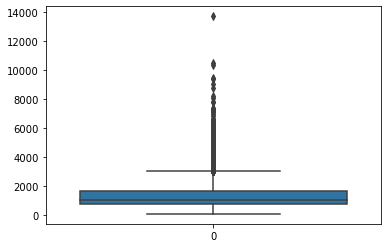

In [10]:
sns.boxplot(data=train_length)


* 가장 많이 사용되는 단어는?

In [11]:
from wordcloud import WordCloud


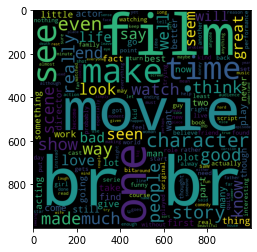

In [12]:
# 여기서는 text 단순히 띄어쓰기를 기준으로 word cloud만들기 - > 전처리 x
cloud = WordCloud(
    width=1000,
    height = 1000, #글꼴, 배경, mask
    
).generate(" ".join(train_data["review"]))
plt.imshow(cloud)


-> br 이라는 html상의 tag들이 텍스트 데이터 안에 들어있다. -> 지워야 함. 

* target : 긍정/부정

<AxesSubplot:xlabel='sentiment', ylabel='count'>

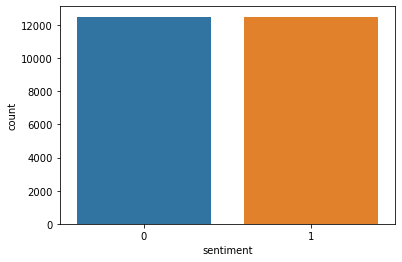

In [13]:
sns.countplot(data = train_data, x="sentiment")


In [14]:
train_data["sentiment"].value_counts()


0    12500
1    12500
Name: sentiment, dtype: int64

* 리뷰 단어 수 분포

In [15]:
train_word_counts = train_data["review"].apply(lambda x : len(x.split(" ")))
train_word_counts


0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64

<ipython-input-16-85d52b889cc4>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

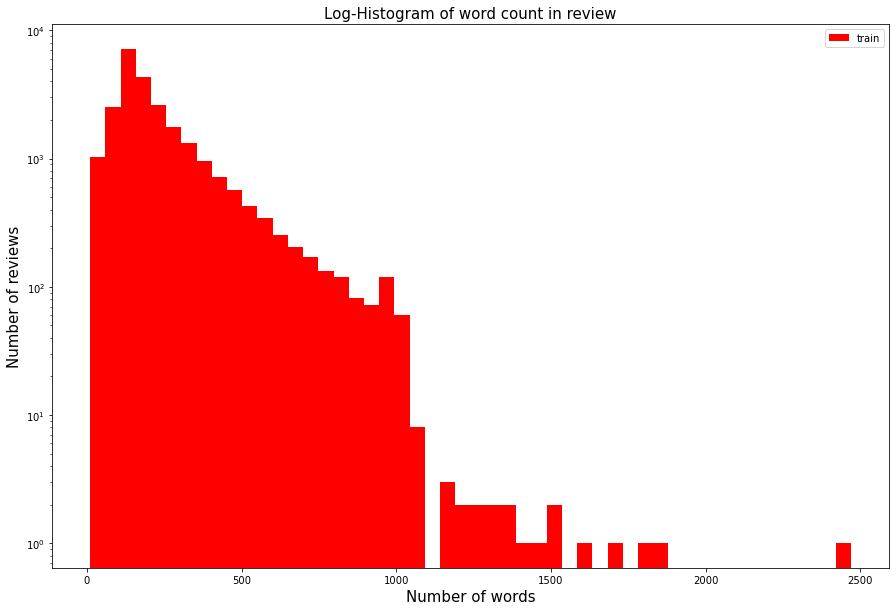

In [16]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)


-> 리뷰 하나에 단어 (띄어쓰기 기준) 가 1000개로 구성됨. 200 전후가 가장 많음.

In [17]:
print("리뷰 단어 최대 길이 값", np.max(train_word_counts))
print("리뷰 단어 최소 길이 값", np.min(train_word_counts))
print("리뷰 단어 평균 길이 값", np.mean(train_word_counts))
print("리뷰 단어 표준편차 길이 값", np.std(train_word_counts))
print("리뷰 단어 중앙값 값", np.median(train_word_counts))

print("리뷰 사분위 25",np.percentile(train_word_counts, 25) )
print("리뷰 사분위 75",np.percentile(train_word_counts, 75) )


리뷰 단어 최대 길이 값 2470
리뷰 단어 최소 길이 값 10
리뷰 단어 평균 길이 값 233.78624
리뷰 단어 표준편차 길이 값 173.74237015380743
리뷰 단어 중앙값 값 174.0
리뷰 사분위 25 127.0
리뷰 사분위 75 284.0


* 특수문자, 대소문자 비율

In [18]:
# 25000개의 리뷰 중에서 리뷰에 ? 가 있는 리뷰는 몇 %일까?
qmarks = np.mean(train_data['review'].apply(lambda x : "?" in x))
qmarks

0.29552

In [19]:
# 25000개의 리뷰 중에서 .(마침표) 가 있는 리뷰는 몇 %인가?
fullstop = np.mean(train_data['review'].apply(lambda x : "." in x))
fullstop

0.99688

In [20]:
# 제일 첫 글자가 대문자로 작성된 것, 리뷰 시작을 대문자로 한 거는 몇 %?
capital_first = np.mean(train_data["review"].apply(lambda x :x[0].isupper() ))
capital_first


0.0

In [21]:
train_data["review"][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

-> 특수문자가 있어서 특수문자 처리에 대한 고민, 지울지, 의미를 부여할지..

-> 대소문자가 섞여있어서 통일도 해야함. 

* 데이터 전처리

In [22]:
import re
import json # -> dict처럼 key-value로 쉽게 처리

import pandas as pd
import numpy as np

# html 상의 tag --> BeautifulSoup
from bs4 import BeautifulSoup

# 불필요한 용어들 제거 -> stopwords -> 자체 구축한 것을 쓰는 것이 아니라 nltk에서 가져와서 사용
from nltk.corpus import stopwords

# 비정형 데이터의 수치화 과정
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer


In [23]:
# 데이터 다시 불러옴 -> 전처리 하려고
train_data = pd.read_csv(DATA_IN_PATH + "labeledTrainData.tsv", header=0 , delimiter="\t", quoting=3)
train_data.head()


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [24]:
train_data["review"][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

* tag값 지우기

In [25]:
temp = train_data["review"][0]
temp_text = BeautifulSoup(temp,"html5lib").get_text() # html 태그를 지우고 순수 text만 남김
temp_text = re.sub("[^a-zA-Z]", " ",temp_text) # 알파벳만 남기고 싶음!!!!
temp_text


' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

* 샘플로 stop_words 처리

In [26]:
stop_words = set(stopwords.words("english"))
temp_text = temp_text.lower()
words = temp_text.split() # 기본적으로 리턴이 리스트와 같은 형식..
words = [ w for w in words if not w in stop_words] 
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [27]:
clean_review = " ".join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

* 전처리 함수 만들기

In [28]:
# 전처리 함수 : stopwords는 옵션으로 처리
def preprocessing(review, remove_stopwords=False):
    # 1. html 테그 제거..
    review_text = BeautifulSoup(review, "html5lib").get_text()
    # 2. 특수문자 숫자 이런거 제외하고 오로지 알파벳으로 된 것들만..
    review_text = re.sub("[^a-zA-Z]", " ",review_text)
    # 3. 소문자로 통일하는 과정.. -> 공백을 기준으로 분리!!!!
    words = review_text.lower().split()
    
    # 4. 불필요한 단어 제거 :ㅣ stop_words -> 선택
    if remove_stopwords:
        stop_words = set(stopwords.words("english"))
        words = [ w for w in words if not w in stop_words]
        # 다시 합쳐서..
        clean_review = " ".join(words) # words는 불용어 처리가 된 것.
    else:
        clean_review = " ".join(words) # words 는 불용어 처리가 안 된 것..
    
    ##### step 1~ 4 
    return clean_review


    
    

In [29]:
# 위의 것들을 바탕으로 데이터 처리
clean_train_reviews = []
for review in train_data["review"]:
    clean_train_reviews.append(preprocessing(review, remove_stopwords=True))
clean_train_reviews[0]


'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

* DF로 처리해보기

In [30]:
clean_train_df = pd.DataFrame({"review" : clean_train_reviews, "sentiment":train_data["sentiment"]})
clean_train_df.head()


,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


* 지금까지 리뷰에서 기본적으로 필요한 단어들만 모아두는 것을 함, 이제는 이 비정형 데이터 리뷰를 정형데이터로 변환할 것.  -> 편하게 하기 위해 keras 에 있는 전처리 함수를 사용할 것

In [31]:
# 쪼개야 할 것임.

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews) # 어떤 단어를 몇 번으로 할지..
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews) # 단어들을 숫자들로..


In [32]:
print(text_sequences[0]) # 텍스트를 숫자로. 수치화,, 모델 돌리기 위해..

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

* 어느 숫자가 어느 단어인지 확인

In [33]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"]=0
print(len(word_vocab)) # word_vocab 파이썬 dict구조

74066


In [34]:
# 위의 함수들은 시간이 걸림, 나중에 위의 과정을 다시 안거치고 출력
# json 패키지를 이용해서 출력하고, 필요하면 로드해서 사용할 수 있도록 수치화 과정에서 사용한 단어들의 룰 집합!!!!!
data_config = {}
data_config["vocab"] = word_vocab
data_config["vocab_size"] = len(word_vocab)


* 리뷰 수치화할때 리뷰마다 차원이 다 다르기 때문에 특정 기준으로 표현해야 함.(여기서는 앞에 EDA 한 단어 분포 보고 중앙값으로 선정)

In [35]:
MAX_SEQUENCE_LENGHT = 174 # 주어진 데이터를 보고 기준선정

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGHT, padding="post")
train_inputs.shape


(25000, 174)

* 정답지 추출

In [36]:
train_labels = np.array(train_data["sentiment"])
print(train_labels.shape)

(25000,)


* 전처리 한 결과들 저장

In [37]:
#처리한 것들을 저장할 폴더 경로
DATA_OUT_PATH = "./data/"

# 처리한 데이터들을 저장할 파일들
TRAIN_INPUT_DATA = "train_input.npy"  #숫자만
TRAIN_LABEL_DATA = "train_label.npy"  # 숫자만
TRAIN_CLEAN_DATA = "train_clean.csv" # 리뷰 정제된 귿
DATA_CONFIGS = "data_config.json" # 수치화 하는 과정에서 사용한 룰!!!


In [38]:
# 출력으로 내보낼 공간의 폴더가 실제 있/없? -> 없으면 만들게
# import os

if not os.path.exists(DATA_OUT_PATH):
    #없다면 만들어라
    os.makedirs(DATA_OUT_PATH)

In [39]:
# 전처리한 것들 데이터 저장
np.save(open(DATA_OUT_PATH + TRAIN_INPUT_DATA, "wb"), train_inputs)
np.save(open(DATA_OUT_PATH + TRAIN_LABEL_DATA, "wb"), train_labels)

# 정제한 데이터의 글
clean_train_df.to_csv(DATA_OUT_PATH + TRAIN_CLEAN_DATA, index = False)

# 정제하고 숫자로 표현하는 과정에서 사용한 룰
json.dump(data_config, open(DATA_OUT_PATH+DATA_CONFIGS, "w"), ensure_ascii=False)


* Test 에 대해서도 위의 기준대로 적용

In [40]:
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)
test_data.head()


,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [41]:
# train과 동일한 기준으로 전처리를 수행을 함!!!!!
clean_test_reviews = []
for review in test_data["review"]:
    clean_test_reviews.append(preprocessing(review, remove_stopwords=True))

# DF로 합쳐두기 -> 정제한 리뷰에 대해서..그리고 최종 제출을 위한 test_id값 미리 체크
clean_test_df = pd.DataFrame({"review":clean_test_reviews, "id":test_data["id"]})
test_id = np.array(test_data["id"])

###################################################################
# 주어진 것들을 숫자데이터로 변환!!!
# 단!!!) 주의!!!!--> train 에 대해서 한 그 규칙 그대로 test에 적용!!!!
#  여기서는 test 데이터로 절대로 fit_on_text를 하면 안 됨!!!!!!
############################
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews) # 단어들을 숫자들로..
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGHT, padding="post")

* test 데이터 변형한것 출력

In [42]:
TEST_INPUT_DATA = "test_input.npy" # 전처리가 되고, 단어들이 숫자까지(최대 175개로) -> 기준은 train과 같은 기준으로!!!
TEST_CLEAN_DATA = "test_clean.csv" # 전처리를 한 실제 review 문장에 대한 것..
TEST_ID_DATA = "test_id.npy"

np.save(open(DATA_OUT_PATH +TEST_INPUT_DATA , "wb"), test_inputs)
np.save(open(DATA_OUT_PATH +TEST_ID_DATA , "wb"), test_id)
clean_test_df.to_csv(DATA_OUT_PATH + TEST_CLEAN_DATA, index=False)


* 다 숫자로 변형됐으니 , Model만들어서 돌릴수 있음. 지금은 RF

In [43]:
# 기존에 머신러닝을 위해 필요했던 모듈과 동일
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 리뷰에 대한 수치 데이터를 feature화 -> 텍스트 데이터 처리를 위해 추가
from sklearn.feature_extraction.text import CountVectorizer


![CV](data/02z.png)


* 모델을 돌리기 위해 저장한 폴더에서 다시 불러오기

In [44]:
# DATA_IN_PATH = "./data2/"
# DATA_OUT_PATH = "./data_out/"
train_data = pd.read_csv(DATA_OUT_PATH+TRAIN_CLEAN_DATA)
train_data.head()

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [45]:
reviews = list(train_data["review"])
y = np.array(train_data["sentiment"])

* CountVectorize

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
vectoizer = CountVectorizer(analyzer="word", max_features=5000)
train_data_features =  vectoizer.fit_transform(reviews)
print(train_data_features.shape)

(25000, 5000)


* train -> test/val

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_input, eval_input, train_label, eval_label = train_test_split(train_data_features, y, test_size=0.2, random_state=1234)


In [50]:
train_input.shape

(20000, 5000)

In [51]:
eval_input.shape

(5000, 5000)

* RF

In [52]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_input, train_label)

RandomForestClassifier()

In [53]:
# eval -> accuracy로 평가!!
from sklearn.metrics import accuracy_score

In [54]:
y_pred = rf_model.predict(eval_input)
accuracy_score(y_pred, eval_label)

0.8414